In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

ModuleNotFoundError: No module named 'matplotlib'

In [691]:
#view the dataset
df = pd.read_csv('WorldCupMatches.csv')
df.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [692]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [693]:
#the shape of the dataset
df.shape

(4572, 20)

In [694]:
#the full description of the datasset
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [695]:
#finding out the the types of data in each column
df.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

## Making a Copy of The Dataset
I would be working with this copy through out the project while the original dataframe would be for referencing when needed

In [696]:
#making a copy of my dataset
df_matches = df.copy()

## Data Wrangling

#### Issue 1: Renaming Columns
This is to achieve uniformity

In [697]:
df_matches = df_matches.rename(columns = {'Year':'year', 'Datetime':'datetime','Stage':'stage','Stadium':'stadium', 
                                         'City':'city','Home Team Name':'home_team_name','Home Team Goals':'home_team_goals',
                                        'Away Team Goals':'away_team_goals', 'Away Team Name':'away_team_name',
                                        'Win conditions':'win_conditions', 'Attendance':'attendance',
                                         'Half-time Home Goals':'half-time_home_goals', 'Half-time Away Goals':'half-time_away_goals',
                                         'Referee':'referee', 'Assistant 1':'assistant_1',
                                         'Assistant 2':'assistant_2','RoundID':'roundID',
                                         'MatchID':'matchID', 'Home Team Initials':'home_team_initials',
                                         'Away Team Initials':'away_team_initials'})


#### Issue 2: Dropping rows with all NaN values

In [698]:
df_matches = df_matches.dropna(axis=0)

#### Issue 3: Normalizing the datetime so as to extract the months and date for further analysis

In [699]:
df_matches['datetime'] = pd.to_datetime(df_matches.datetime).dt.strftime('%Y-%m-%d')
df_matches['datetime'] = pd.to_datetime(df_matches['datetime'])
df_matches['month'] = pd.to_datetime(df_matches.datetime).dt.month
df_matches['day'] = pd.to_datetime(df_matches.datetime).dt.day

#### Issue 4: `year`, `month` and `day`

In [700]:
#confirmining if there are any null values
df_matches[['year', 'month', 'day']].isnull().sum()

year     0
month    0
day      0
dtype: int64

In [701]:
#convert to int datatype
df_matches[['year', 'month', 'day']] = df_matches[['year', 'month', 'day']].astype(int)

#### Issue 5: 	`home_team_goals`, `away_team_goals`, `half-time_away_goals`, `roundID`	and `matchID`

In [702]:
#confirmining if there are any null values
df_matches[['home_team_goals', 'away_team_goals', 'half-time_away_goals', 'roundID', 'matchID']].isnull().sum()

home_team_goals         0
away_team_goals         0
half-time_away_goals    0
roundID                 0
matchID                 0
dtype: int64

In [703]:
#convert to int datatype
df_matches[
['home_team_goals', 'away_team_goals', 
'half-time_away_goals', 'roundID', 'matchID']] = df_matches[
['home_team_goals', 'away_team_goals', 
'half-time_away_goals', 'roundID', 'matchID']].astype(int)

#### Issue 6: Replace `win_conditions` Blank values with NaN to None 

In [704]:
#replace empty values with NaN values
df_matches['win_conditions'] = df_matches['win_conditions'].replace(r'^\s*$', np.nan, regex=True) 
df_matches['win_conditions']

0                                        NaN
1                                        NaN
2                                        NaN
3                                        NaN
4                                        NaN
                       ...                  
847    Netherlands win on penalties (4 - 3) 
848                                      NaN
849      Argentina win on penalties (2 - 4) 
850                                      NaN
851            Germany win after extra time 
Name: win_conditions, Length: 850, dtype: object

In [705]:
df_matches['win_conditions'] = df_matches['win_conditions'].fillna('None')

In [706]:
df_matches

,year,datetime,stage,stadium,city,home_team_name,home_team_goals,away_team_goals,away_team_name,win_conditions,...,half-time_away_goals,referee,assistant_1,assistant_2,roundID,matchID,home_team_initials,away_team_initials,month,day
0,1930,1930-07-13,Group 1,Pocitos,Montevideo,France,4,1,Mexico,None,...,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,7,13
1,1930,1930-07-13,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,None,...,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,7,13
2,1930,1930-07-14,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,None,...,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,7,14
3,1930,1930-07-14,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,None,...,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,7,14
4,1930,1930-07-15,Group 1,Parque Central,Montevideo,Argentina,1,0,France,None,...,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,2014-07-05,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),...,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC,7,5
848,2014,2014-07-08,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,None,...,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,7,8
849,2014,2014-07-09,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),...,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG,7,9
850,2014,2014-07-12,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,None,...,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED,7,12


## Exporting the Cleaned Data to a New csv

In [707]:
#export the data to a new csv file
df1_matches = df_matches.to_csv('WorldCupMatches_clean.csv', index = False)

## Exploratory Data Analysis

In [708]:
df_Matches = pd.read_csv('WorldCupMatches_clean.csv')
df_Matches

,year,datetime,stage,stadium,city,home_team_name,home_team_goals,away_team_goals,away_team_name,win_conditions,...,half-time_away_goals,referee,assistant_1,assistant_2,roundID,matchID,home_team_initials,away_team_initials,month,day
0,1930,1930-07-13,Group 1,Pocitos,Montevideo,France,4,1,Mexico,None,...,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,7,13
1,1930,1930-07-13,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,None,...,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,7,13
2,1930,1930-07-14,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,None,...,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,7,14
3,1930,1930-07-14,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,None,...,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,7,14
4,1930,1930-07-15,Group 1,Parque Central,Montevideo,Argentina,1,0,France,None,...,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2014,2014-07-05,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),...,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC,7,5
846,2014,2014-07-08,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,None,...,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,7,8
847,2014,2014-07-09,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),...,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG,7,9
848,2014,2014-07-12,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,None,...,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED,7,12


#### <span style='color: blue'> Question 1. The data in WorldCupMatches.csv has the goals scored in each match broken up by goals for the home team and goals for the away team. Visualize the total number of goals scored in each match. Create a new column in df named Total Goals, and set it equal to the sum of the columns Home Team Goals and Away Team Goals. Print the results of df.head() to confirm your new column

In [709]:
#creating a new column total goals
df_Matches['total_goals'] = df_Matches['home_team_goals'] + df_Matches['away_team_goals']
df_Matches.head()

,year,datetime,stage,stadium,city,home_team_name,home_team_goals,away_team_goals,away_team_name,win_conditions,...,referee,assistant_1,assistant_2,roundID,matchID,home_team_initials,away_team_initials,month,day,total_goals
0,1930,1930-07-13,Group 1,Pocitos,Montevideo,France,4,1,Mexico,None,...,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,7,13,5
1,1930,1930-07-13,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,None,...,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,7,13,3
2,1930,1930-07-14,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,None,...,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,7,14,3
3,1930,1930-07-14,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,None,...,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,7,14,4
4,1930,1930-07-15,Group 1,Parque Central,Montevideo,Argentina,1,0,France,None,...,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,7,15,1


#### <span style='color: blue'> Question 2. Create a bar chart visualizing how many goals were scored each year the World Cup was held between 1930-2014.  Set the style of your plot to be whitegrid . This will add gridlines to the plot which will make it easier to read the visualization.

In [710]:
#grouping the goals based on the year to get their total sum
df_Matches1 = df_Matches.groupby(['year'])['total_goals'].sum().reset_index(
            name='total_goals').sort_values(['year'])
df_Matches1

,year,total_goals
0,1930,70
1,1934,70
2,1938,84
3,1950,88
4,1954,140
5,1958,126
6,1962,89
7,1966,89
8,1970,95
9,1974,97


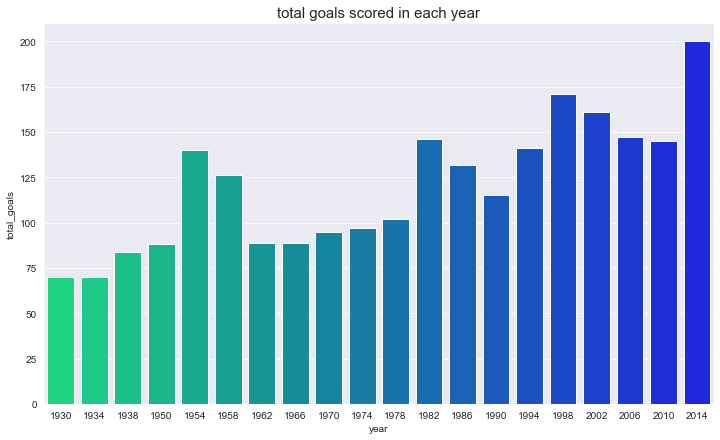

In [711]:
# plotting the results using a bar chart
fig, ax = plt.subplots(figsize=(12,7),  sharex=True)
sns.set_style("whitegrid")
ax = sns.barplot(x = 'year', y = 'total_goals', data = df_Matches1, palette = 'winter_r')
ax.set_title('total goals scored in each year', fontsize= 15)
plt.show()

#### <span style='color: blue'> Question 3. Create a box plot so you can visualize the distribution of the average goals for each year with a bar chart.

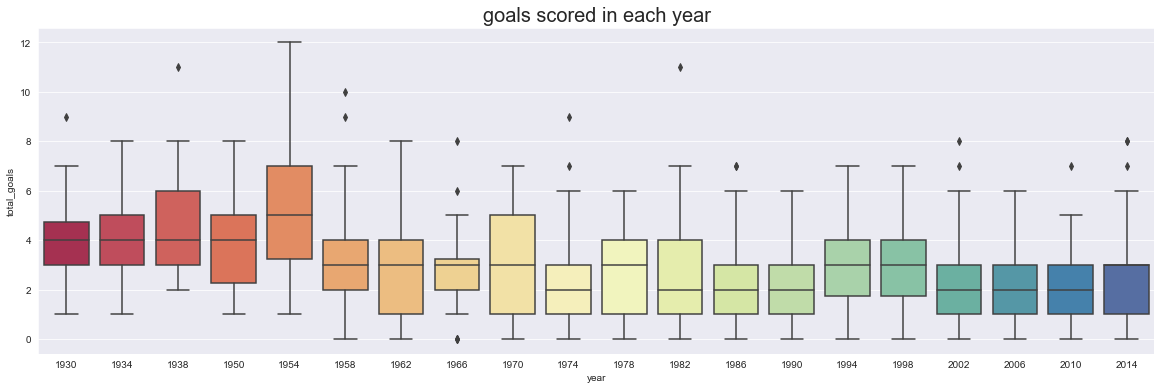

In [714]:
# plotting the results using a box plot
fig, ax = plt.subplots( figsize=(20,6),  sharex=True)
sns.set_style("darkgrid")
ax = sns.boxplot(x = 'year', y = 'total_goals', data = df_Matches,  palette='Spectral')
ax.set_title('goals scored in each year', fontsize= 20)
plt.show()